In [127]:
import skimage.io as skio
import skimage
import glob
import matplotlib.pyplot as plt
from sklearn.metrics import jaccard_score
import numpy as np
from tools import *
from sklearn.model_selection import train_test_split
import random

In [23]:
IM_PATH = glob.glob('data/Fluo-N2DL-HeLa/01/*.tif')
TG_PATH = glob.glob('data/Fluo-N2DL-HeLa/01_GT/TRA/*.tif')

In [107]:
img, tg = [], []
for im_path, tg_path in zip(IM_PATH,TG_PATH) :
    im = skio.imread(im_path,plugin='pil')
    im = skimage.img_as_float(im)
    im = (im -im.min())/(im.max() - im.min())
    img.append(im)
    tg.append(skio.imread(tg_path,plugin='pil') > 0)

In [119]:
X_train, X_test, y_train, y_test = train_test_split(img,tg,test_size=0.2,shuffle=True)

(700, 1100)

Best threshold : 0.108, score : 0.387124654660093


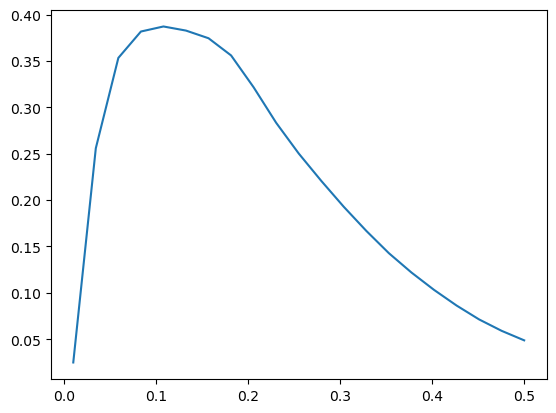

In [120]:
scores = []
threshold = np.linspace(0.01,0.5,21)
for thresh in threshold:
    temp_score = []
    for im,target in zip(X_train,y_train):
        seg = thresholding(im,thresh)
        temp_score.append(jaccard_score(target,seg,average='micro'))
    scores.append(np.mean(temp_score))
plt.plot(threshold,scores)
idx_best_thresh = np.argmax(scores)
best_thresh = threshold[idx_best_thresh]
print('Best threshold : {}, score : {}'.format(best_thresh,scores[idx_best_thresh]))

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        2., 1., 4., 3., 1., 3., 2., 2., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
        0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
        0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
        0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
        0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
        0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
        0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
        0.77, 0.78, 0.79, 0.8 , 

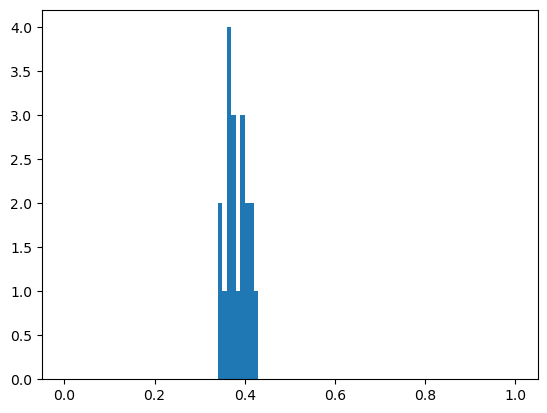

In [136]:
results = []
manual_thresh = best_thresh
for im,target in zip(X_test,y_test):
    seg = thresholding(im,manual_thresh)
    results.append(jaccard_score(target,seg,average='micro'))
plt.hist(results,bins=100,range=(0,1))

Text(0.5, 1.0, 'false positive')

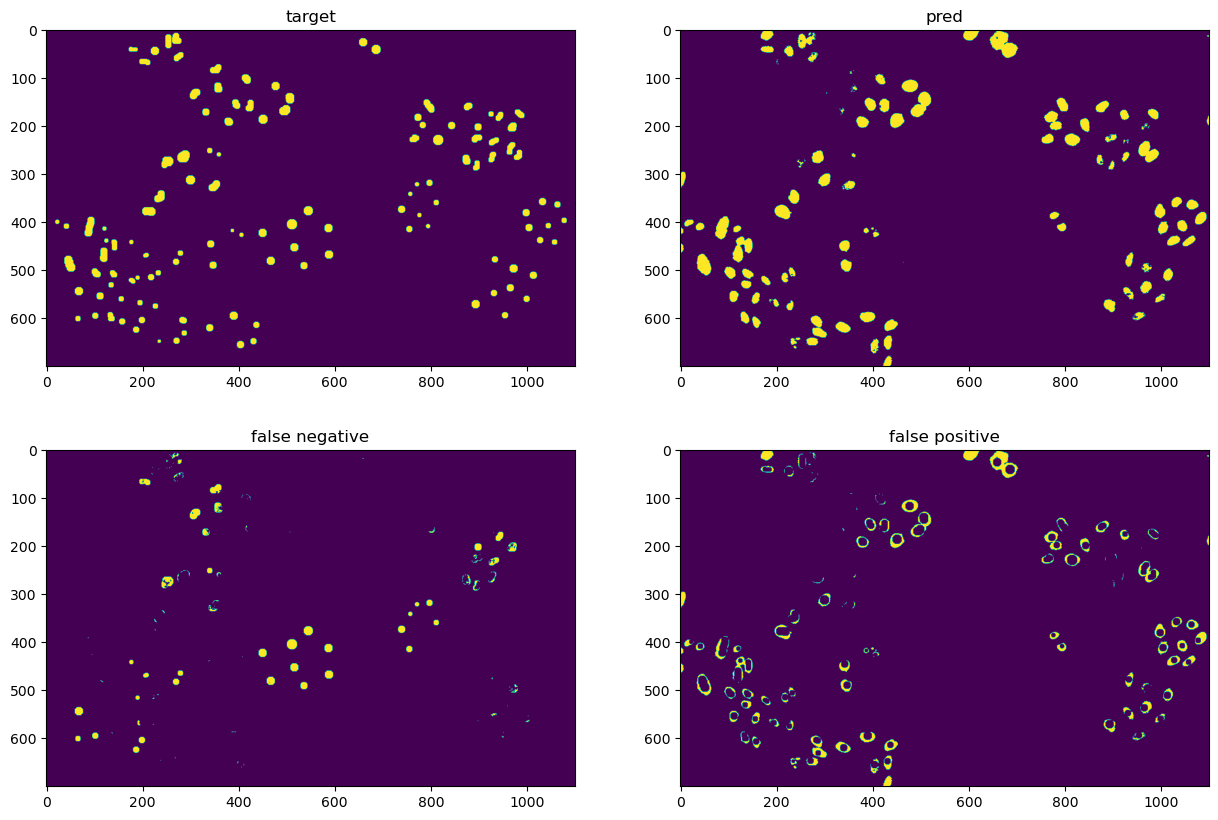

In [131]:
n_im = random.randrange(len(y_test))
tg = y_test[n_im]
seg = X_test[n_im] > best_thresh

fig, ax = plt.subplots(2,2,figsize=(15,10))
ax[0,0].imshow(tg)
ax[0,0].set_title('target')
ax[0,1].imshow(seg)
ax[0,1].set_title('pred') 
ax[1,0].imshow(tg & ~seg)
ax[1,0].set_title('false negative')
ax[1,1].imshow(~tg & seg) 
ax[1,1].set_title('false positive') 